In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("ds_salaries.csv")

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
df = df.drop(["salary", "salary_currency"], axis=1)

In [8]:
df = df.astype({'job_title': 'string', 
                 'experience_level': 'string',
                 'employment_type': 'string',
                 'employee_residence': 'string',
                 'company_location': 'string',
                 'company_size': 'string'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   string
 2   employment_type     3755 non-null   string
 3   job_title           3755 non-null   string
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   string
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   string
 8   company_size        3755 non-null   string
dtypes: int64(3), string(6)
memory usage: 264.1 KB


In [10]:
def create_bar(x_labels:list, y_data:list, 
               title:str="", labels:tuple=("", ""),
               width:int = 0.5, horizontal:bool = False):
    """ # Create_bar
        Create a bar chart
    Args:
        x_labels (list): data points to create x axis
        y_data (list): data points to create y axis
        title (str, optional): text to set title. Defaults to "".
        labels (tuple, optional): tuple with x and y labels. Defaults to ("", "").
    """
    
    fig = plt.figure(figsize=(10, 5))
    subplot = fig.add_subplot(111)
    font_title = {
        "fontsize": 15,
        "color": "green",
        "fontweight": "bold",
    }
    font_labels = {
        "fontsize": 12,
        "color": "green"
    }
    
    subplot.set_title(title, fontdict=font_title)
    subplot.set_xlabel(labels[0], fontdict=font_labels)
    subplot.set_ylabel(labels[1], fontdict=font_labels)
    if horizontal:
        subplot.barh(x_labels, y_data, 
                color="green",
                height=width)
    else:
        subplot.bar(x_labels, y_data, 
                color="green",
                width=width)
    plt.show()


In [11]:
def create_pie(values:list, labels:list, title:str="", startangle:int=0):
    """ # Create_pie
        Create a pie chart

    Args:
        values (list): values to create pie chart
        labels (list): list of labels for each value
        title (str, optional): title to chart. Defaults to "".
        startangle (int, optional): angle where the chart begins. Defaults to 0.
    """
    
    fig = plt.figure(figsize=(10, 5))
    subplot = fig.add_subplot(111)
    
    font_title = {
        "fontsize": 15,
        "color": "green",
        "fontweight": "bold",
    }
    
    subplot.set_title(title, fontdict=font_title)
    
    try:
        wedges, text = subplot.pie(values, startangle=startangle)
        subplot.legend(labels=labels, loc="best")
    except ValueError:
        print(f"Check the values and labels.")
        print(f"Values: {values}, Labels: {labels} and Startangle: {startangle}")
    
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, bbox=bbox_props,
              va="center")
    for i, w in enumerate(wedges):
        ang = (w.theta2 - w.theta1)/2. + w.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        subplot.annotate(f"{values[i]} - {labels[i]}", xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    
    plt.show()

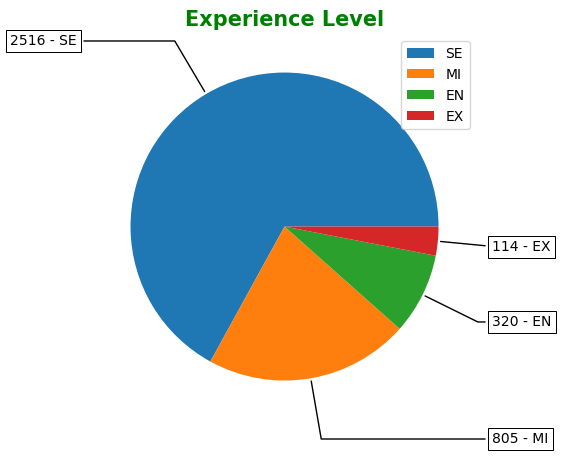

In [12]:
# to know how many people are expert in the job

values = list(df["experience_level"].value_counts().values)
index = list(df["experience_level"].value_counts().index)

create_pie(values, index, "Experience Level", 0)


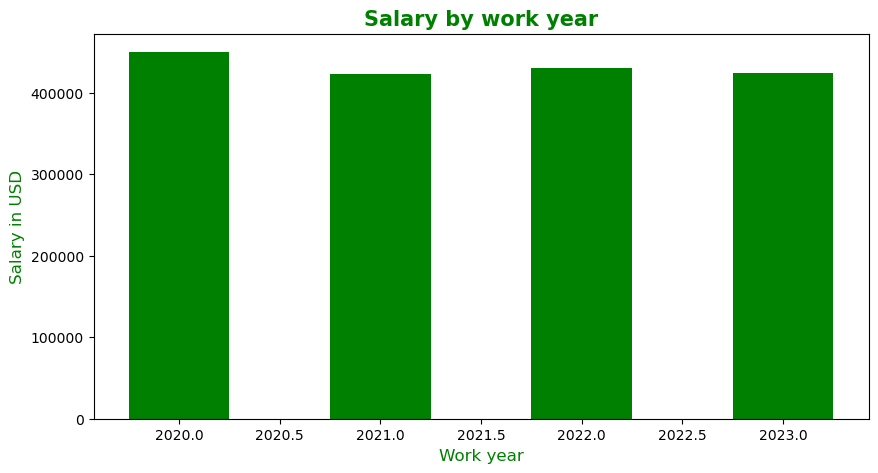

In [13]:
# to know how many people salaries had increased

create_bar(df["work_year"], df["salary_in_usd"], 
           title="Salary by work year", 
           labels=("Work year", "Salary in USD"))

In [14]:
# in which country people can earn most

df_country_gby = df.groupby(["company_location"])["salary_in_usd"].agg("mean")

In [15]:
# in which top five countries people can earn the money most

df_country_gby.sort_values(ascending=False, inplace=True)

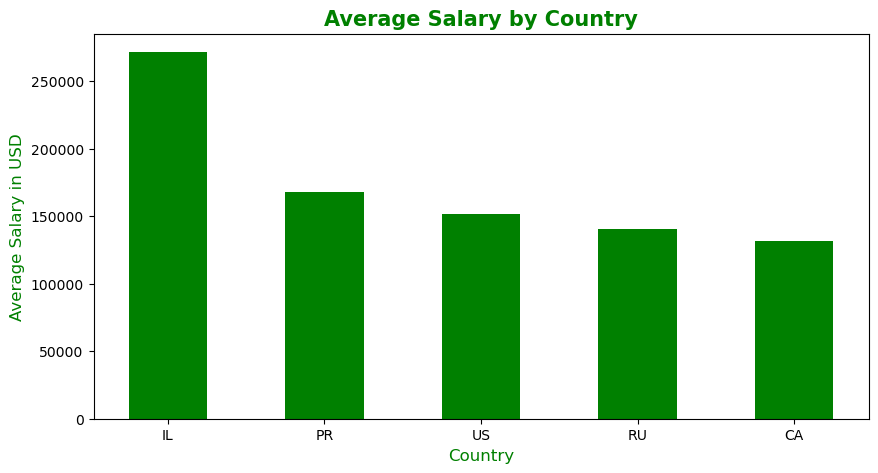

In [16]:
create_bar(df_country_gby.index[0:5], 
           df_country_gby.values[0:5], 
           "Average Salary by Country", ("Country", "Average Salary in USD"))

In [17]:
# top 5 countries where people can earn least money

df_country_gby.sort_values(ascending=True, inplace=True)

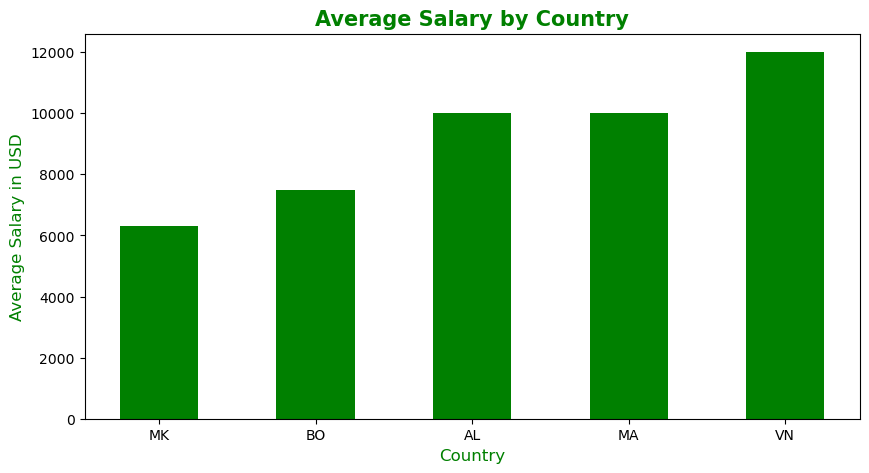

In [18]:
create_bar(df_country_gby.index[0:5], 
           df_country_gby.values[0:5], 
           "Average Salary by Country", 
           ("Country", "Average Salary in USD"))

In [19]:
# in which job people can earn most money

df_job_gby = df.groupby("job_title")["salary_in_usd"].agg("mean")

In [20]:
# top 5 jobs where people can earn most money

df_job_gby.sort_values(ascending=False, inplace=True)

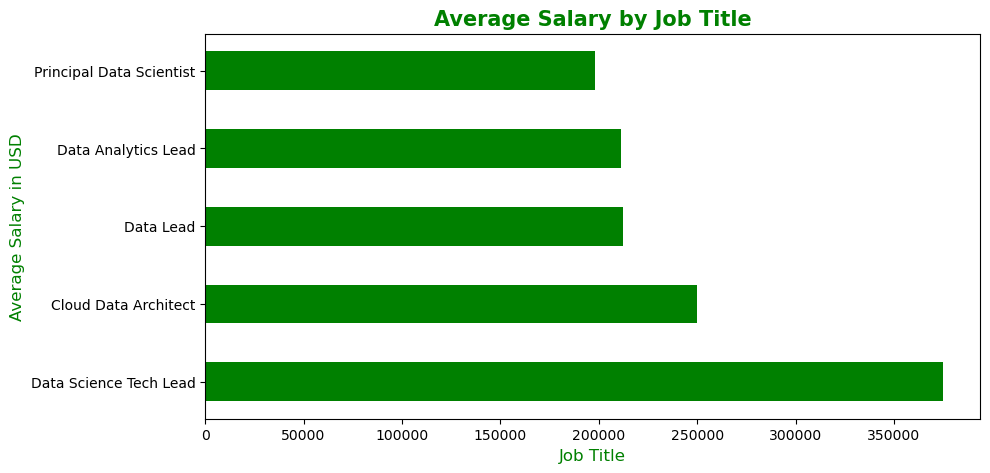

In [21]:
create_bar(df_job_gby.index[0:5],
            df_job_gby.values[0:5],
            "Average Salary by Job Title",
            ("Job Title", "Average Salary in USD"), horizontal=True)

In [22]:
# Top 5 jobs where people can earn least money

df_job_gby.sort_values(ascending=True, inplace=True)

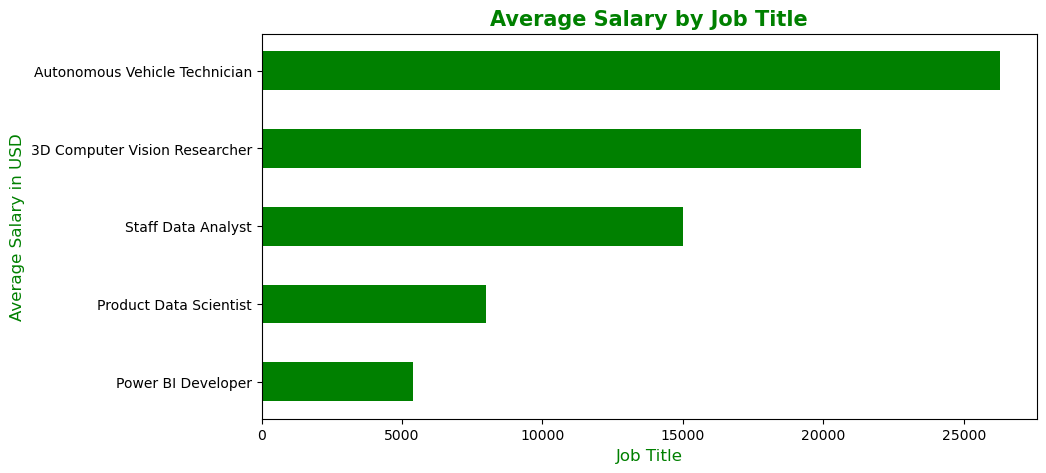

In [23]:
create_bar(df_job_gby.index[0:5],
            df_job_gby.values[0:5],
            "Average Salary by Job Title",
            ("Job Title", "Average Salary in USD"),
            horizontal=True)

In [24]:
# in my experience how much money can i earn

df_experience_level = df.groupby(["experience_level"])["salary_in_usd"].agg("mean")

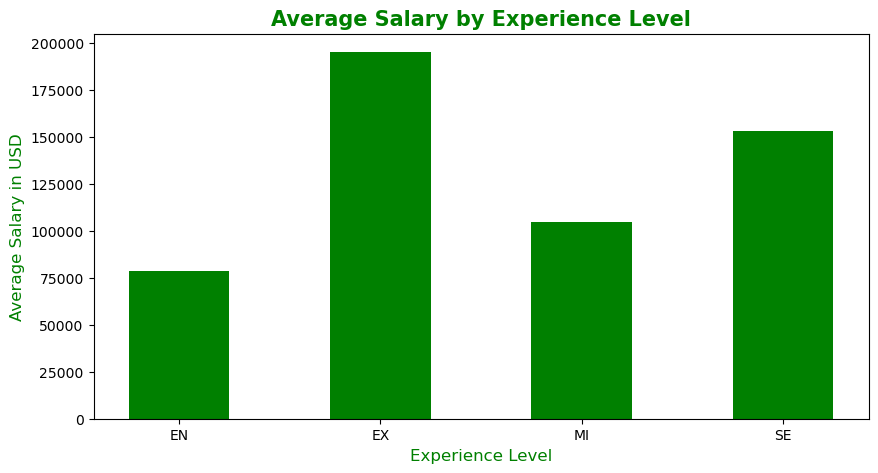

In [25]:
create_bar(df_experience_level.index,
                 df_experience_level.values,
                 "Average Salary by Experience Level",
                 ("Experience Level", "Average Salary in USD"))

In [26]:
# Which country is the one where the company pays the most

df_company_location_gby = df.groupby(["company_location"])["salary_in_usd"].agg("mean")

In [27]:
# Top 5 jobs where i can earn most money

df_company_location_gby.sort_values(ascending=False, inplace=True)

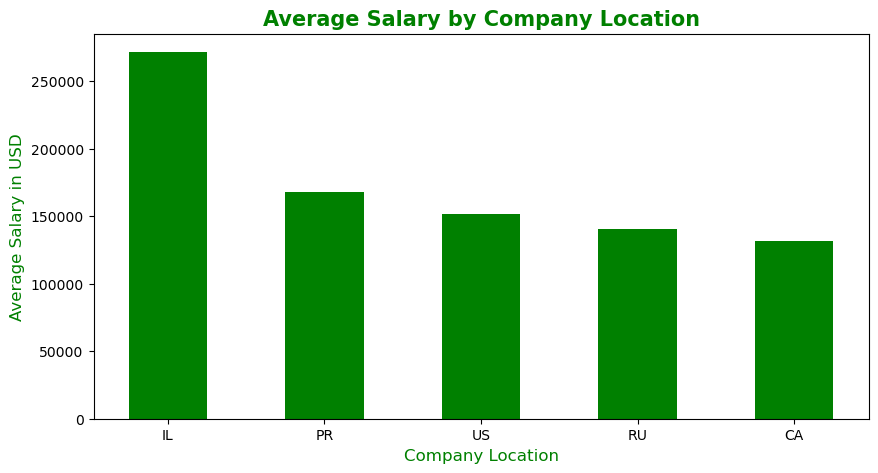

In [28]:
create_bar(df_company_location_gby.index[0:5],
           df_company_location_gby.values[0:5],
           "Average Salary by Company Location",
           ("Company Location", "Average Salary in USD"))

In [29]:
# top 5 jobs where people can earn least salary 

df_company_location_gby.sort_values(ascending=False, inplace=True)

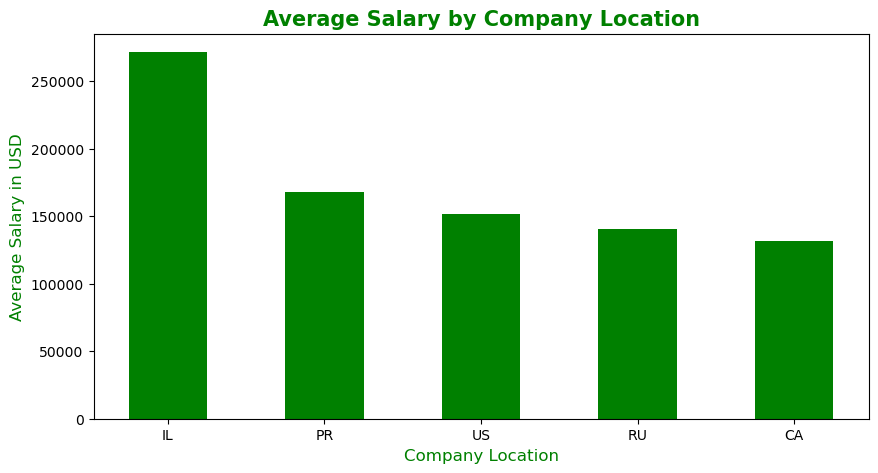

In [30]:
create_bar(df_company_location_gby.index[0:5],
           df_company_location_gby.values[0:5],
           "Average Salary by Company Location",
           ("Company Location", "Average Salary in USD"))

In [31]:
# Is important if the job is remote

df_remote_gby = df.groupby(["remote_ratio"])["salary_in_usd"].agg("mean")

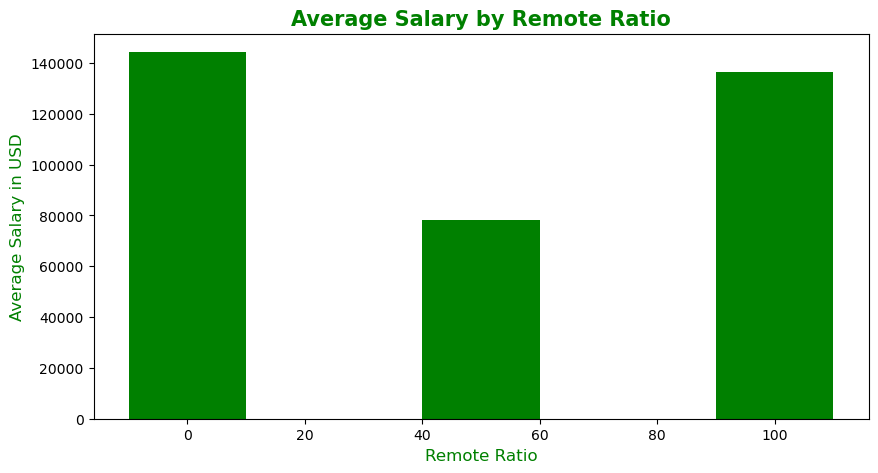

In [32]:
create_bar(df_remote_gby.index, 
           df_remote_gby.values,
           "Average Salary by Remote Ratio",
           ("Remote Ratio", "Average Salary in USD"),
           width=20)

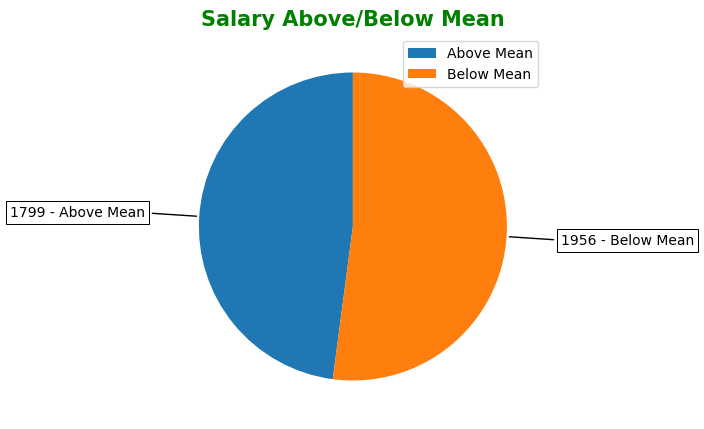

In [33]:
# how many people earn mean salary
mean = df["salary_in_usd"].mean()
above_mean_salary = df[df["salary_in_usd"] > mean]
below_mean_salary = df[df["salary_in_usd"] < mean]

values_above_mena = above_mean_salary.shape[0]
values_below_mean = below_mean_salary.shape[0]

create_pie([values_above_mena, values_below_mean], 
           ["Above Mean", "Below Mean"], 
           "Salary Above/Below Mean", 90)

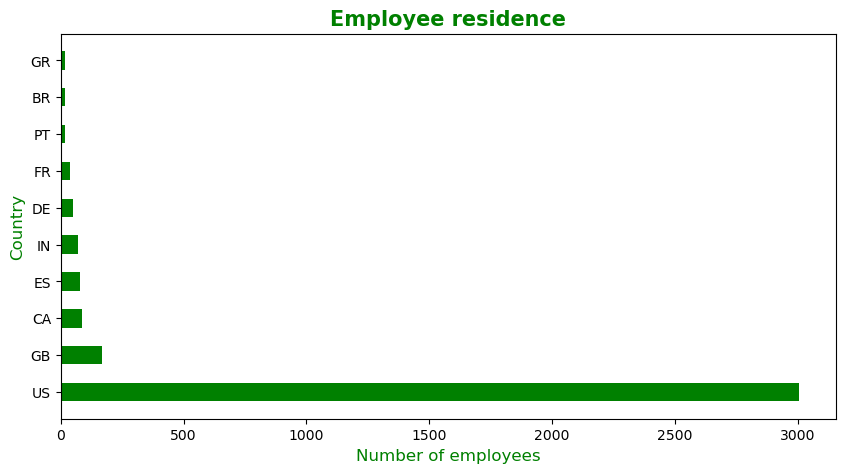

In [34]:
# where the people wwork
employee_residence = df["employee_residence"].value_counts().sort_values(ascending=False)
create_bar(employee_residence.index[0:10], employee_residence.values[0:10], 
           "Employee residence", ("Number of employees", "Country"), horizontal=True)

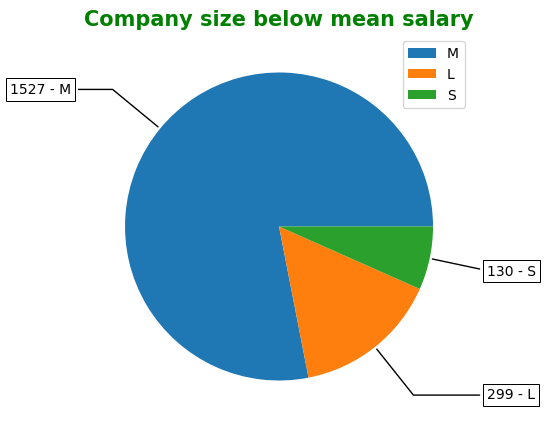

In [35]:
# size of their companies
counts_below = below_mean_salary["company_size"].value_counts()

create_pie(counts_below.values, counts_below.index, "Company size below mean salary")

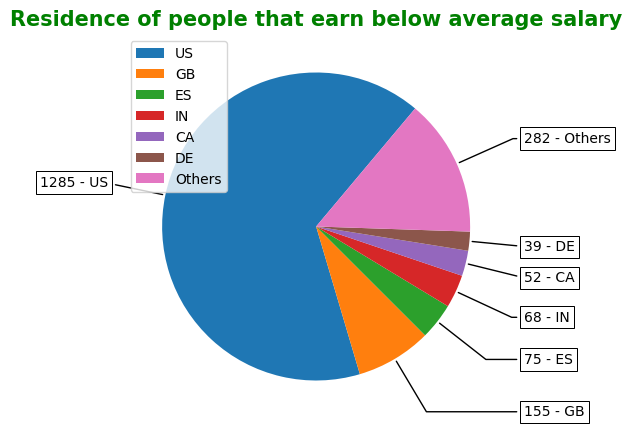

In [36]:
# where they work 
residence_below_mean = below_mean_salary["employee_residence"].value_counts()
others_residence_below_mean = residence_below_mean[6:].sum()
residence_below_mean = pd.concat([residence_below_mean[0:6], 
                                  pd.Series({"Others": others_residence_below_mean})], axis=0)


create_pie(residence_below_mean.values, residence_below_mean.index, 
            "Residence of people that earn below average salary", 50)

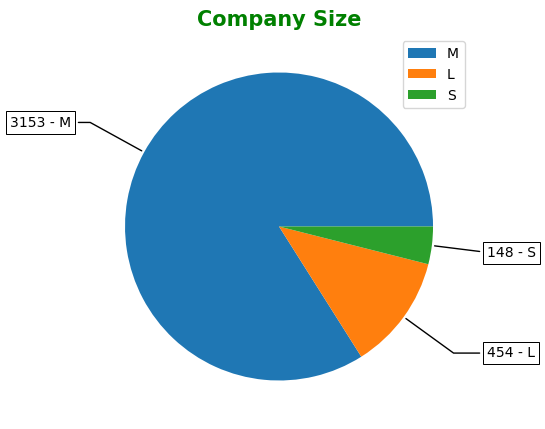

In [37]:
# How many people work in big companies

size_company = df["company_size"].value_counts().sort_values(ascending=False)
create_pie(size_company.values, size_company.index, "Company Size")